**KAGGLE COMPETITION : DEEP LEARNING APPROACH**

**A. Preprocessing**
1. Import libraries
2. Import dataset
3. Basic data cleaning : get rid of null values, punctuation and html tags
4. NLP data preprocessing : remove stop words, stem/lemmatize words
5. Word embeddings
<!-- 5. Test-Train split
6. Vecorize data (fit on the train data and use on train+test data) with countvec or tfidfvec
7. Oversample data (deal with imbalanced data with SMOTE) -->

**B. Models**

Implement DL models (RNN,LSTM,BERT...)

**C. Make prediction** 

Submit predictions and put my name on the leaderboard !!

In [1]:
import pandas as pd
import numpy as np
import regex as re
import os
import pickle
import scipy
import nltk
from imblearn.over_sampling import SMOTE
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import regex as re
import os
import nltk
from imblearn.over_sampling import SMOTE
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

def clean_reviews(review):
    #find and replace all punctuation with "" and all html tags with " " + lower
    print("   ")
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    review = REPLACE_NO_SPACE.sub("", review.lower()) 
    review = REPLACE_WITH_SPACE.sub(" ", review)
    return review

def remove_repeating_words(review):
    #review1 = ' '.join(set(review.split()))
    review = ' '.join(dict.fromkeys(review.split()))
    return review

def remove_stop_words(review):
    stop_words_list = ENGLISH_STOP_WORDS #stop_words.
    review = " ".join(word for word in review.split(" ") if word not in stop_words_list)
    return review

def stem_reviews(review):
    # PB : NEED TO INITIATE A NEW STEMMER FOR EACH ROW...
    stemmer = PorterStemmer()
    #separator.join(list of strings) => 1 long string
    #string.split(separator) => list of strings
    review = " ".join([stemmer.stem(word) for word in review.split(" ")])
    return review

def lemmatize_reviews(review):
    lemmatizer = WordNetLemmatizer()
    #separator.join(list of strings) => 1 long string
    #string.split(separator) => list of strings
    review = " ".join([lemmatizer.lemmatize(word) for word in review.split(" ")])
    return review

def oversample(data_list):
    [X_train, y_train, X_eval, y_eval] = data_list
    sm = SMOTE()
    X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
    X_eval_sm, y_eval_sm = sm.fit_resample(X_eval,y_eval)
    assert len(y_train_sm.value_counts().unique())==1 and len(y_eval_sm.value_counts().unique())==1
    return [X_train_sm, y_train_sm,X_eval_sm, y_eval_sm]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def read_input_data(filename, separator, use_cols, header, col_dict):
    print("Reading input data")
    df = pd.read_csv(filename, sep = separator, usecols = use_cols, header = header)
    df.rename(columns = col_dict, inplace = True)
    print(df.shape)
    print(df.head())
    return df

def basic_clean(df) -> None:
    print("Basic Data Preprocessing : \n Dropping null values \n Getting rid of punctuation and HTML tags + text in lowercase \n Removing repeating words")
    df.dropna(inplace = True)
    df["Reviews"] = df["Reviews"].apply(lambda row : remove_repeating_words(clean_reviews(row)))


def nlp_clean(df, nlp_method) -> None:
    print("NLP Data Preprocessing : Removing stop words \n Stemming/Lemmatizing reviews")
    if nlp_method == "stem":
        df["Reviews"] = df["Reviews"].apply(lambda row : stem_reviews(remove_stop_words(row)))
    elif nlp_method == "lemmatize":
        df["Reviews"] = df["Reviews"].apply(lambda row : lemmatize_reviews(remove_stop_words(row)))
    else:
        df["Reviews"] = df["Reviews"].apply(lambda row : remove_stop_words(row))

def data_split(X, y, test_size = 0.2, random_state = 42) -> None:
    y_ohe = pd.get_dummies(y)
    print(y_ohe)
    data_list = train_test_split(X,y_ohe,test_size=test_size,random_state=random_state)
    return data_list

In [4]:
# print("**************** PREPROCESSING TRAIN DATA ****************")
# train_vec, train_data_list = data_preprocessor_train("train.tsv", '\t', 0, [2, 3], {"Phrase":"Reviews","Sentiment":"Sentiments"})
# print("**************** PREPROCESSING TEST DATA ****************")
# test_vec, test_data = data_processor_test("test.tsv", '\t', 0, [0, 2], [0],{"Phrase":"Reviews"}, train_vec) #NO NEED FOR THE PHRASEID COLUMN (INDEX IS NOT NECESSARY)

df = read_input_data("data/train.csv", ',', [3,4],0,{"text":"Reviews","target":"Sentiments"})
basic_clean(df)
nlp_clean(df,"lemmatize")
print(df.head())

Reading input data
(7613, 2)
                                             Reviews  Sentiments
0  Our Deeds are the Reason of this #earthquake M...           1
1             Forest fire near La Ronge Sask. Canada           1
2  All residents asked to 'shelter in place' are ...           1
3  13,000 people receive #wildfires evacuation or...           1
4  Just got sent this photo from Ruby #Alaska as ...           1
Basic Data Preprocessing : 
 Dropping null values 
 Getting rid of punctuation and HTML tags + text in lowercase 
 Removing repeating words
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
 

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

MAX_WORDS = 2500
MAX_LEN = 200

def tokenize_data(df, tk = None, max_words = MAX_WORDS, max_len = MAX_LEN):
    data = df['Reviews'].values.tolist()
    print(data[:10])
    if tk == None:
        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(data)
    else:
        tokenizer = tk
    sequences_init = tokenizer.texts_to_sequences(data)
    sequences = pad_sequences(sequences_init, maxlen=max_len)
    print(f"Size of input tokenized data :\n(Nb of samples, sequence length) = {sequences.shape}")
    # print(sequences)
    return sequences, tokenizer



Using TensorFlow backend.


In [6]:
sequences, tokenizer = tokenize_data(df)
data_list = data_split(sequences, df["Sentiments"])
data_list


['deed reason #earthquake allah forgive', 'forest near la ronge sask canada', 'resident asked shelter place notified officer evacuation order expected', '13000 people receive #wildfires evacuation order california', 'just got sent photo ruby #alaska smoke #wildfires pours school', '#rockyfire update => california hwy 20 closed direction lake county #cafire #wildfires', '#flood #disaster heavy rain cause flash flooding street manitou colorado spring area', 'im hill wood', 'there emergency evacuation happening building street', 'im afraid tornado coming area']
Size of input tokenized data :
(Nb of samples, sequence length) = (7613, 200)
      0  1
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
7608  0  1
7609  0  1
7610  0  1
7611  0  1
7612  0  1

[7613 rows x 2 columns]


[array([[   0,    0,    0, ...,  150,    1,    2],
        [   0,    0,    0, ..., 1552,  328,  127],
        [   0,    0,    0, ...,   38,    1,    2],
        ...,
        [   0,    0,    0, ...,  895,    1,    2],
        [   0,    0,    0, ...,  430,    1,    2],
        [   0,    0,    0, ...,   14,    1,    2]]),
 array([[   0,    0,    0, ...,   56,  108,  249],
        [   0,    0,    0, ...,  290,   44, 1513],
        [   0,    0,    0, ..., 1629,    1,    2],
        ...,
        [   0,    0,    0, ...,  135,    1,    2],
        [   0,    0,    0, ...,  157,    1,    2],
        [   0,    0,    0, ...,  305,    1,    2]]),
       0  1
 4996  0  1
 3263  1  0
 4907  0  1
 2855  0  1
 4716  1  0
 ...  .. ..
 5226  1  0
 5390  1  0
 860   1  0
 7603  0  1
 7270  0  1
 
 [6090 rows x 2 columns],
       0  1
 2644  0  1
 2227  1  0
 5448  0  1
 132   1  0
 6845  1  0
 ...  .. ..
 1835  1  0
 506   0  1
 3592  0  1
 6740  0  1
 1634  1  0
 
 [1523 rows x 2 columns]]

In [15]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def simple_model(data_list, type):
    model_name = f"simple_model_{type}"
    X_train, X_test, y_train, y_test = data_list
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    model1 = Sequential()
    model1.add(layers.Embedding(MAX_WORDS, 20, input_length=MAX_LEN)) #The embedding layer
    if type == "lstm":
        model1.add(layers.LSTM(15,dropout=0.5)) #Our LSTM layer with dropout (regularization)
    else:
    # Possibility to add multiple RNN layers instead of a single LSTM layer
    # NEED TO RETURN ALL SEQUENCES !!!
        model1.add(layers.SimpleRNN(15, return_sequences=True))
        model1.add(layers.SimpleRNN(15, dropout=0.5))
    model1.add(layers.Dense(2,activation='sigmoid')) #Activation function for binary classifiation
    # OUTPUT VECTORS MUST BE ONE HOT ENCODED !!!!!!!!!!!!!
    print(model1.summary())

    model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=[get_f1]) #other optimizer : rmsprop, adadelta


    checkpoint1 = ModelCheckpoint(f"best_{model_name}.hdf5", monitor='val_get_f1', verbose=5,save_best_only=True, mode='max', period=1,save_weights_only=False)
    history = model1.fit(X_train, y_train, epochs=20,batch_size=128,validation_data=(X_test, y_test),callbacks=[checkpoint1])
    return history, model_name

def bid_model(data_list):
    model_name = f"bid_model_{type}"
    X_train, X_test, y_train, y_test = data_list
    model2 = Sequential()
    model2.add(layers.Embedding(MAX_WORDS, 40, input_length=MAX_LEN))
    model2.add(layers.Bidirectional(layers.LSTM(128,dropout=0.2))) #0.2
    model2.add(layers.Dense(64, activation = 'relu'))
    model2.add(layers.Dropout(0.5))
    model2.add(layers.Dense(2,activation='sigmoid'))
    print(model2.summary())
    model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=[get_f1]) 
    checkpoint2 = ModelCheckpoint(f"best_{model_name}.hdf5", monitor='val_get_f1', verbose=5,save_best_only=True, mode='max', period=1,save_weights_only=False)
    history = model2.fit(X_train, y_train, epochs=30,batch_size=256, validation_data=(X_test, y_test),callbacks=[checkpoint2])
    return history, model_name

def conv1D_model(data_list):
    model_name = f"conv1D_model_{type}"
    X_train, X_test, y_train, y_test = data_list
    model3 = Sequential()
    model3.add(layers.Embedding(MAX_WORDS, 40, input_length=MAX_LEN))
    model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
    model3.add(layers.MaxPooling1D(5))
    model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
    model3.add(layers.GlobalMaxPooling1D())
    model3.add(layers.Dense(2,activation='sigmoid'))
    print(model3.summary())
    model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=[get_f1])
    checkpoint3 = ModelCheckpoint(f"best_{model_name}.hdf5", monitor='val_get_f1', verbose=5,save_best_only=True, mode='max', period=1,save_weights_only=False)
    history = model3.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test), callbacks=[checkpoint3])
    return history, model_name


In [16]:
from time import time
t0 = time()
# history, model_name = simple_model(data_list, "lstm")
history, model_name = bid_model(data_list)
# history, model_name = conv1D_model(data_list)
train_time = time() - t0
print(train_time)
# print(history.history)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 40)           100000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               173056    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 289,569
Trainable params: 289,569
Non-trainable params: 0
_________________________________________________________________
None


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\adrie\anaconda3\envs\sentiment\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\adrie\AppData\Local\Temp\ipykernel_31612\1445954457.py", line 4, in <module>
    history, model_name = bid_model(data_list)
  File "C:\Users\adrie\AppData\Local\Temp\ipykernel_31612\3656606644.py", line 56, in bid_model
    history = model2.fit(X_train, y_train, epochs=30,batch_size=256, validation_data=(X_test, y_test),callbacks=[checkpoint2])
  File "C:\Users\adrie\anaconda3\envs\sentiment\lib\site-packages\keras\engine\training.py", line 1154, in fit
    batch_size=batch_size)
  File "C:\Users\adrie\anaconda3\envs\sentiment\lib\site-packages\keras\engine\training.py", line 621, in _standardize_user_data
    exception_prefix='target')
  File "C:\Users\adrie\anaconda3\envs\sentiment\lib\site-packages\keras\engine\training_utils.py", line 145, in standardize_i

<Figure size 432x288 with 0 Axes>

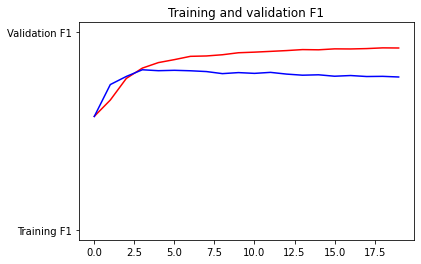

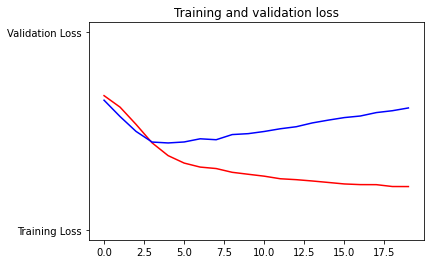

<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f1 = history.history['get_f1']
val_f1 = history.history['val_get_f1']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(f1))
plt.plot(epochs, f1, 'r', 'Training F1')
plt.plot(epochs, val_f1, 'b', 'Validation F1')
plt.title('Training and validation F1')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [14]:
from keras import models

df_test = read_input_data("data/test.csv", ',', [3],0,{"text":"Reviews"})
basic_clean(df_test)
nlp_clean(df_test,"lemmatize")
X_pred, _ = tokenize_data(df_test, tk = tokenizer)
print(X_pred)

dependencies = {
    'get_f1': get_f1
}

final_model = models.load_model(f"best_{model_name}.hdf5", custom_objects=dependencies)
final_pred = final_model.predict_classes(X_pred)
# index = pd.read_csv("test.tsv", sep = '\t').index

submission = pd.read_csv("data/test.csv",usecols=[0])
submission["target"] = final_pred  #pd.DataFrame({"id":[i for i in range(156061,222353)],"target":y_pred})
submission.to_csv(f"Submission_{model_name}.csv", index=False)

Reading input data
(3263, 1)
                                             Reviews
0                 Just happened a terrible car crash
1  Heard about #earthquake is different cities, s...
2  there is a forest fire at spot pond, geese are...
3           Apocalypse lighting. #Spokane #wildfires
4      Typhoon Soudelor kills 28 in China and Taiwan
Basic Data Preprocessing : 
 Dropping null values 
 Getting rid of punctuation and HTML tags + text in lowercase 
 Removing repeating words
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
 

C:\Users\adrie\anaconda3\envs\sentiment\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
